In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import numpy as np

def visualize(df1, df2):
    # Remove the ".pdf" extension from filenames in both dataframes
    df1['filename'] = df1['filename'].str.replace('.pdf', '', regex=False)
    df2['filename'] = df2['filename'].str.replace('.pdf', '', regex=False)

    # Merge on filename to compare actual and predicted labels
    comparison = df1.merge(df2, on="filename")
    
    # Map labels to binary values: YES -> 1, NO -> 0
    y_true = comparison["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = comparison["predicted_label"].map({"YES": 1, "NO": 0})

    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)


    # Visualize the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix, cmap='Blues')
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Actual Label")

    # Set tick marks and labels (assuming binary classification: NO=0, YES=1)
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(["NO", "YES"])
    ax.set_yticklabels(["NO", "YES"])

    # Annotate the confusion matrix with counts
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    fig.colorbar(im, ax=ax)
    plt.show()


In [47]:
truth_path= r"../Final/csv_data/new_test_actual.csv"
truth = pd.read_csv(truth_path)

Accuracy: 0.70
Precision: 0.67
Recall: 0.84
F1 Score: 0.74


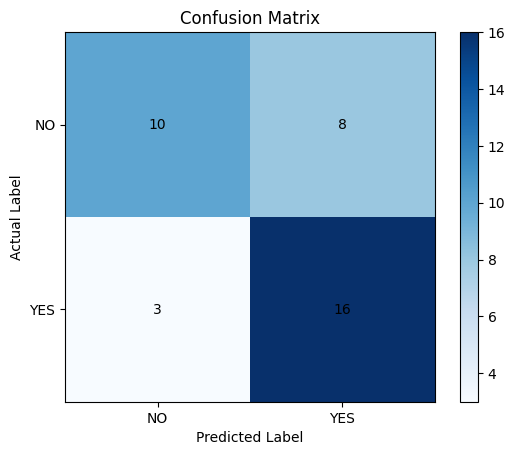

In [48]:
truth_path_2= r"../Final/csv_data/new_2.csv"
truth_2 = pd.read_csv(truth_path_2)
pred_path_40_1 = r"../Final/result/waste_40/test_2_predictions_40_4_full.csv" 
pred_40_1 = pd.read_csv(pred_path_40_1)
visualize(truth_2, pred_40_1)

Accuracy: 0.80
Precision: 1.00
Recall: 0.33
F1 Score: 0.50


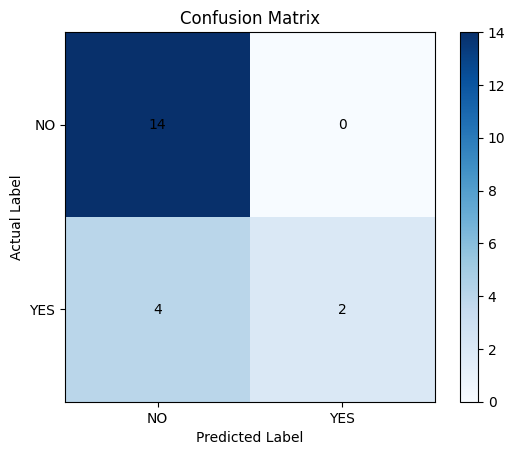

In [49]:
# 40
pred_path_40 = r"../Final/result/waste_40/test_predictions_20_2_half.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

In [50]:
# 40
pred_path_40 = r"../Final/result/test_predictions_20_1.csv" 
pred_40 = pd.read_csv(pred_path_40)
visualize(truth, pred_40)

FileNotFoundError: [Errno 2] No such file or directory: '../Final/result/test_predictions_20_1.csv'

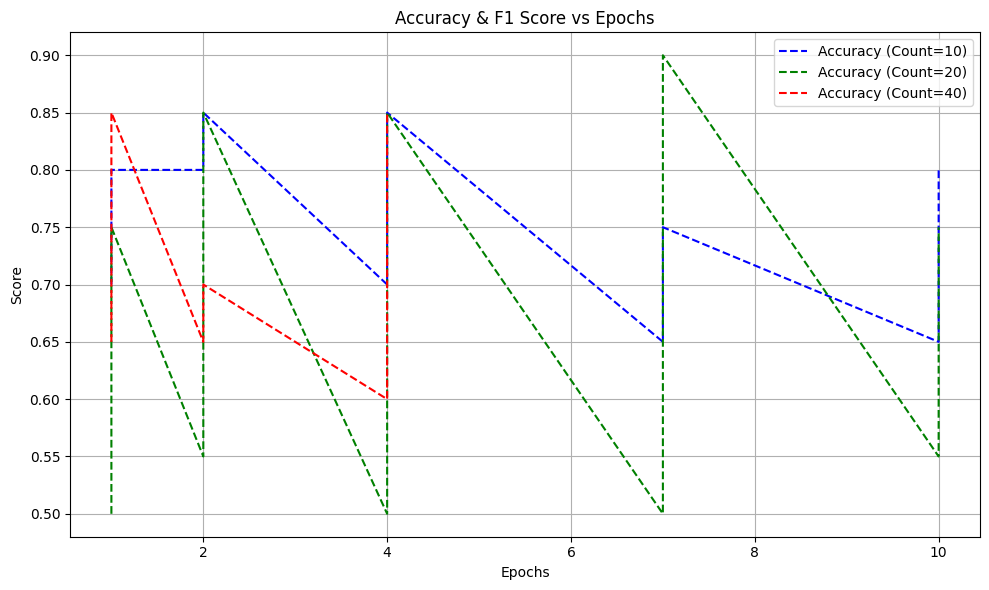

In [ ]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Folder with result CSVs ===
result_folder = "result/waste_40"

# Store scores by count and epoch
metrics_by_count = {}

# Go through each result file
for file in os.listdir(result_folder):
    if not file.endswith(".csv"):
        continue
    
    # Extract count and epoch from file name: test_predictions_<count>_<epoch>.csv
    parts = file.replace(".csv", "").split("_")
    count = int(parts[2])
    epoch = int(parts[3])
    
    pred_df = pd.read_csv(os.path.join(result_folder, file))
    pred_df['filename'] = pred_df['filename'].str.replace('.pdf', '', regex=False)

    # Merge with ground truth
    merged = truth_df.merge(pred_df, on="filename", how="inner")

    y_true = merged["actual_label"].map({"YES": 1, "NO": 0})
    y_pred = merged["predicted_label"].map({"YES": 1, "NO": 0})

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Store metrics
    if count not in metrics_by_count:
        metrics_by_count[count] = {"epochs": [], "accuracy": [], "f1": []}
    
    metrics_by_count[count]["epochs"].append(epoch)
    metrics_by_count[count]["accuracy"].append(acc)
    metrics_by_count[count]["f1"].append(f1)

# === Plot ===
plt.figure(figsize=(10, 6))
colors = {10: 'blue', 20: 'green', 40: 'red'}

for count, metrics in sorted(metrics_by_count.items()):
    # Sort by epoch
    sorted_data = sorted(zip(metrics["epochs"], metrics["accuracy"], metrics["f1"]))
    epochs, accs, f1s = zip(*sorted_data)

    # Plot accuracy
    plt.plot(epochs, accs, label=f"Accuracy (Count={count})", linestyle='--', color=colors[count])

    # Plot F1 (thicker)
    # plt.plot(epochs, f1s, label=f"F1 Score (Count={count})", linewidth=2.5, color=colors[count])

plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Accuracy & F1 Score vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


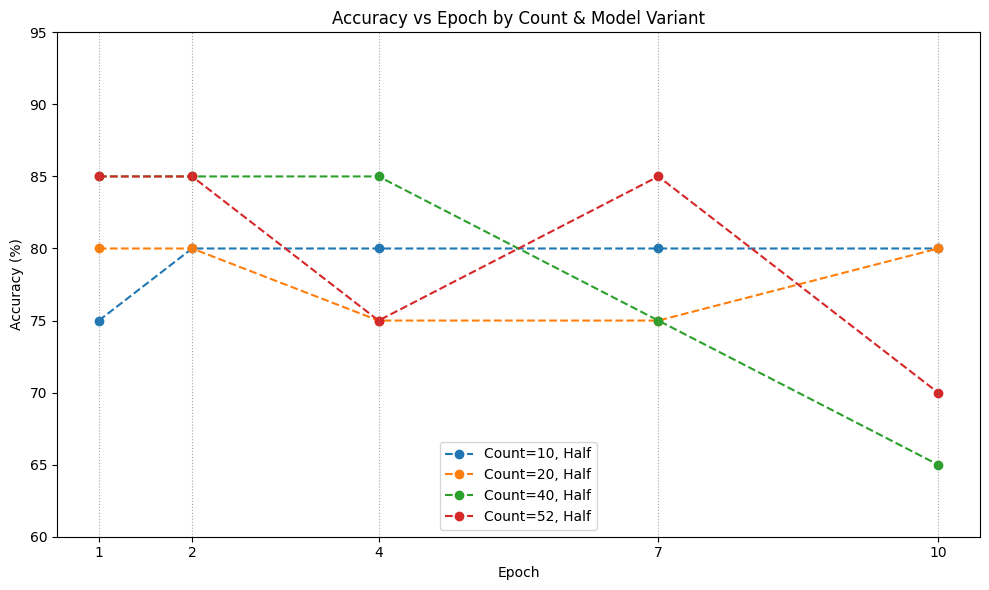

In [ ]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Folder with result CSVs ===
result_folder = "result/waste_52"

# === Collect metrics ===
metrics = {}  # (count, variant) -> {'epochs':[], 'accuracy':[], 'f1':[]}
for fn in os.listdir(result_folder):
    if not fn.endswith(".csv"):
        continue

    _, _, cnt_s, ep_s, variant = fn[:-4].split("_")
    count, epoch = int(cnt_s), int(ep_s)
    variant = variant.lower()  # "full" or "half"

    df = pd.read_csv(os.path.join(result_folder, fn))
    df['filename'] = df['filename'].str.replace('.pdf', '', regex=False)
    merged = truth_df.merge(df, on="filename", how="inner")

    y_true = merged["actual_label"].map({"YES":1, "NO":0})
    y_pred = merged["predicted_label"].map({"YES":1, "NO":0})

    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)

    key = (count, variant)
    metrics.setdefault(key, {'epochs':[], 'accuracy':[], 'f1':[]})
    metrics[key]['epochs'].append(epoch)
    metrics[key]['accuracy'].append(acc * 100)  # scale to percent
    metrics[key]['f1'].append(f1 * 100)

# === Plot ===
fig, ax = plt.subplots(figsize=(10,6))

colors     = {10:'C0', 20:'C1', 40:'C2', 52:'C3'}
linestyles = {'full':'-', 'half':'--'}
xticks     = [1, 2, 4, 7, 10]
yticks     = [60,65, 70, 75, 80, 85, 90,95]

# 1) Plot each series
for (count, variant), data in sorted(metrics.items()):
    xs, ys = zip(*sorted(zip(data['epochs'], data['accuracy'])))
    ax.plot(xs, ys,
            color=colors[count],
            linestyle=linestyles[variant],
            marker='o',
            label=f"Count={count}, {variant.capitalize()}")

# 2) Draw vertical lines at the xticks
for x in xticks:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.8, alpha=0.7)

# 3) Now set the ticks and limits
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_ylim(min(yticks), max(yticks))

# 4) Labels, title, legend
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy vs Epoch by Count & Model Variant")
ax.legend(loc='best')

fig.tight_layout()
plt.show()


Skipping folder: waste_40_1
Skipping folder: waste_40_10
Skipping folder: waste_40_2
Skipping folder: waste_40_3
Skipping folder: waste_40_4
Skipping folder: waste_40_5
Skipping folder: waste_40_6
Skipping folder: waste_40_7
Skipping folder: waste_40_8
Skipping folder: waste_40_9


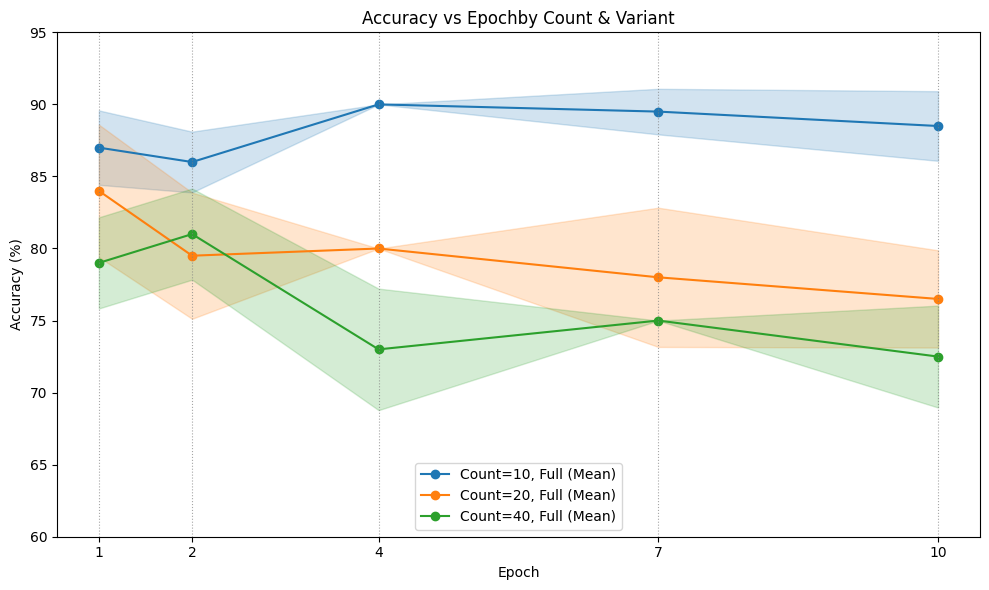

In [ ]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from collections import defaultdict
import re
# === Load ground truth ===
truth_path = r"../Final/csv_data/new_test_actual.csv"
truth_df = pd.read_csv(truth_path)
truth_df['filename'] = truth_df['filename'].str.replace('.pdf', '', regex=False)

# === Base folder with multiple result folders ===
base_folder = "result"
metric_records = defaultdict(list)  # (count, epoch, variant) -> list of accuracies


for folder in os.listdir(base_folder):
    if not re.fullmatch(r"waste_40_\d+", folder):
        continue
    print(f"Skipping folder: {folder}")
    folder_path = os.path.join(base_folder, folder)
    if not os.path.isdir(folder_path):
        continue

    for fn in os.listdir(folder_path):
        if not fn.endswith(".csv"):
            continue

        try:
            _, _, cnt_s, ep_s, variant = fn[:-4].split("_")
            count, epoch = int(cnt_s), int(ep_s)
            variant = variant.lower()
        except:
            continue  # skip if filename format is unexpected
        if variant=="half":
            df = pd.read_csv(os.path.join(folder_path, fn))
            df['filename'] = df['filename'].str.replace('.pdf', '', regex=False)
            merged = truth_df.merge(df, on="filename", how="inner")

            y_true = merged["actual_label"].map({"YES":1, "NO":0})
            y_pred = merged["predicted_label"].map({"YES":1, "NO":0})

            acc = accuracy_score(y_true, y_pred)
            metric_records[(count, epoch, variant)].append(acc * 100)  # percentage

aggregated_metrics = defaultdict(lambda: {'epochs': [], 'mean': [], 'std': []})
for (count, epoch, variant), acc_list in metric_records.items():
    key = (count, variant)
    aggregated_metrics[key]['epochs'].append(epoch)
    aggregated_metrics[key]['mean'].append(sum(acc_list) / len(acc_list))
    aggregated_metrics[key]['std'].append(pd.Series(acc_list).std())
    # aggregated_metrics[key]['min'].append(min(acc_list))
    # aggregated_metrics[key]['max'].append(max(acc_list))


fig, ax = plt.subplots(figsize=(10, 6))
colors     = {10:'C0', 20:'C1', 40:'C2', 52:'C3'}
linestyles = {'full':'-', 'half':'--'}
xticks     = [1, 2, 4, 7, 10]
yticks     = [60, 65, 70, 75, 80, 85, 90, 95]


for (count, variant), data in sorted(aggregated_metrics.items()):
    # epochs, mean_accs, min_accs, max_accs = zip(*sorted(zip(data['epochs'], data['mean'], data['min'], data['max'])))

    # ax.plot(epochs, mean_accs,
    #         color=colors[count],
    #         linestyle=linestyles[variant],
    #         marker='o',
    #         label=f"Count={count}, {variant.capitalize()} (Mean)")

    # ax.fill_between(epochs, min_accs, max_accs,
    #             color=colors[count],
    #             alpha=0.2)
    epochs, means, stds = zip(*sorted(zip(data['epochs'], data['mean'], data['std'])))
    lower = [m - s for m, s in zip(means, stds)]
    upper = [m + s for m, s in zip(means, stds)]

    ax.plot(epochs, means,
            color=colors[count],
            linestyle=linestyles[variant],
            marker='o',
            label=f"Count={count}, {variant.capitalize()} (Mean)")

    ax.fill_between(epochs, lower, upper,
                    color=colors[count],
                    alpha=0.2)

for x in xticks:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.8, alpha=0.7)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_ylim(min(yticks), max(yticks))

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy vs Epochby Count & Variant")
ax.legend(loc='best')
fig.tight_layout()
plt.show()
